In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### LOADING DATASET OF PUBLIC HEALTH
##### WE CAN SEE ALL THESE BELOW VARIABLES

In [66]:
#let's look at the data
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


#### CHECKING NUMBER OF FEATURES IN THE DATASET

In [67]:
#There are 101766 rows and 50 columns present
df.shape 

(101766, 50)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

#### CHECKING WHETHER THE DATA CONTAINS ANY MISSING VALUES OR NOT 

In [69]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

#### TO CHECK IF ANY SPECIAL CHARACTERS IN THE DATA OR NOT [COUNT]

In [70]:
for i in df.columns:
    if df[i].dtype == object:
        print(i,df[i][df[i] =='?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


#### DROP SOME COLUMNS 

In [71]:
df = df.drop(['weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3'], axis = 1)

In [72]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


#### CHECKING NUMBER OF FEATURES IN THE DATASET

In [73]:
#There are 101766 rows and 44 columns present
df.shape 

(101766, 44)

In [74]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [75]:
df.drop(['encounter_id','patient_nbr'], axis=1, inplace=True)

In [76]:
df.shape 

(101766, 42)

#### TO CHECK IF ANY SPECIAL CHARACTERS IN THE DATA OR NOT [COUNT]

In [77]:
for i in df.columns:
    if df[i].dtype == object:
        print(i,df[i][df[i] =='?'].count())

race 2273
gender 0
age 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


#### THERE ARE UNKNOW CATEGORY FOR RACE AND THEREFORE WE NEED TO REPLACE WITH nan and the total of it add it to Caucasian.

In [78]:
df['race'].value_counts()

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [79]:
df['race'] = df['race'].replace('?',np.nan)

In [80]:
df['race'].unique()

array(['Caucasian', 'AfricanAmerican', nan, 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [81]:
df['race'] = df['race'].fillna(df['race'].mode()[0])

In [82]:
df['race'].value_counts()

race
Caucasian          78372
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

#### THERE IS A THIRD CATEGORY WHICH ARE MISSING OR UNKNOWN VALUES, I CAN DROP IT.

In [83]:
df['gender'].value_counts()

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

In [84]:
df['gender'] = df['gender'].replace('Unknown/Invalid',np.nan)
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

In [85]:
df['gender'].value_counts()

gender
Female    54711
Male      47055
Name: count, dtype: int64

In [86]:
df.replace('?', np.nan,inplace=True)

In [87]:
df.isnull().sum()

race                            0
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
troglitazone  

#### MOST OF POPULATION RANGES FROM 50 YEARS OLD TO 80 YEARS OLD  

In [88]:
df['age'].value_counts()

age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

THERE ARE MULTIPLE AND UNIQUE DISCHARGE DISPOSITIN ID BY I UNKNOWN THE DESCRIPTION.

In [89]:
df['discharge_disposition_id'].value_counts()

discharge_disposition_id
1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: count, dtype: int64

#### SUM OF MEDICATIONS BY AGE

<Axes: title={'center': 'Number of Medications vs. Age'}, xlabel='Age', ylabel='Number of Medications'>

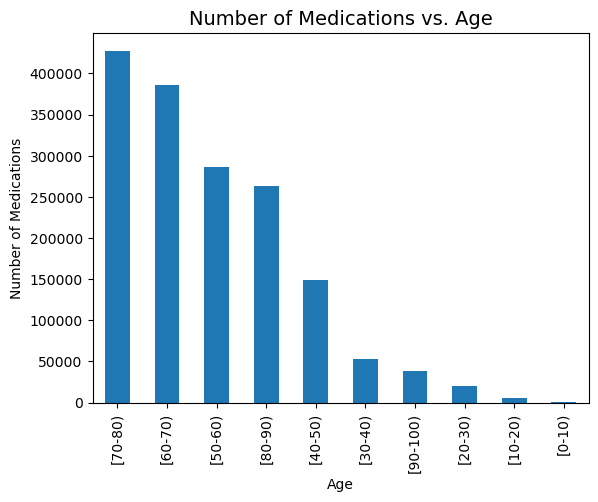

In [90]:
age_medic = df.groupby('age')['num_medications'].sum().sort_values(ascending=False).plot.bar()
plt.title ('Number of Medications vs. Age', fontsize = 14)
plt.xlabel('Age')
plt.ylabel('Number of Medications')
age_medic

In [91]:
#I have imported a new library seaborn as sns
#View a Strip Plot which is a type of scatter plot and each point represents an observation.
#The x-axis represents the categorical variable (Age) and the y-axis represents the numerical variable (# of medicine).

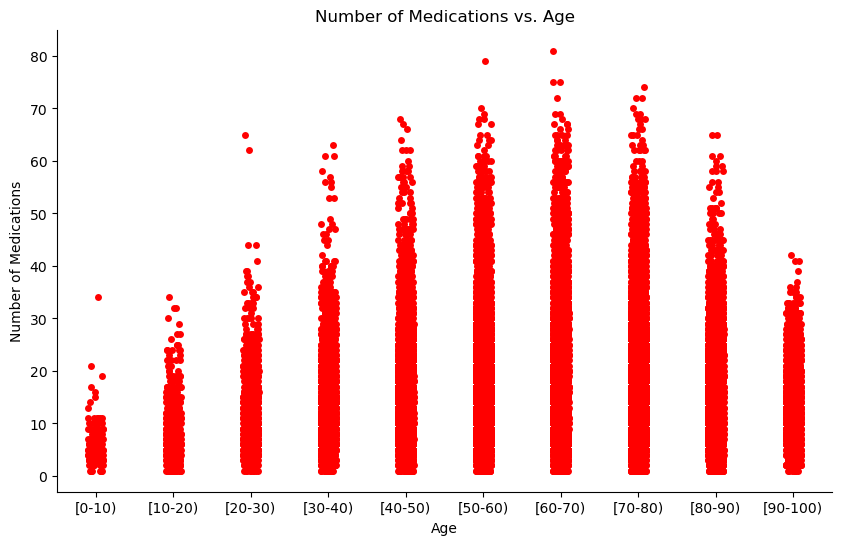

In [92]:
#Let's try to see how the age and number of medicines vary,
sortage = df.sort_values(by = 'age')
x = sns.stripplot(x = "age", y = "num_medications", data = sortage, color = 'red')
sns.despine() #remove top and right axes
x.figure.set_size_inches(10, 6)
x.set_xlabel('Age')
x.set_ylabel('Number of Medications')
x.axes.set_title('Number of Medications vs. Age')
plt.show()

FEMALE GROUP SEEMS TO BE FALLING IN THE GROUP WITH MOST READMITTION OVER 30 DAYS FOLLOW BY MALE 

In [93]:
df.groupby(['readmitted', 'gender'])['gender'].count()

readmitted  gender
<30         Female     6152
            Male       5205
>30         Female    19518
            Male      16027
NO          Female    29041
            Male      25823
Name: gender, dtype: int64

AGAIN GROUPING BY AGE I OBSERVE THAT THE MOST COUNT FALLS IN THE RANGE OF 70-80 YEARS OLD WITH 9475.

In [94]:
df.groupby(['age', 'readmitted'])['readmitted'].count()

age       readmitted
[0-10)    <30               3
          >30              26
          NO              132
[10-20)   <30              40
          >30             224
          NO              427
[20-30)   <30             236
          >30             510
          NO              911
[30-40)   <30             424
          >30            1187
          NO             2164
[40-50)   <30            1027
          >30            3278
          NO             5380
[50-60)   <30            1668
          >30            5917
          NO             9671
[60-70)   <30            2502
          >30            7897
          NO            12084
[70-80)   <30            3069
          >30            9475
          NO            13524
[80-90)   <30            2078
          >30            6223
          NO             8896
[90-100)  <30             310
          >30             808
          NO             1675
Name: readmitted, dtype: int64

#### COMPARISON OF NUMBER OF MEDICATIONS BY GENDER

Based on the plot dispay below Female is the largest indicator that takes more number of medications comparing with Male. 

<Axes: title={'center': 'Number of Medications by Gender'}, xlabel='Gender', ylabel='Number of Medications'>

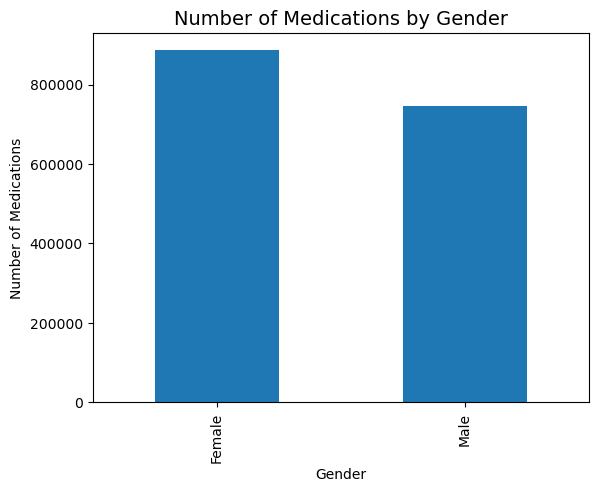

In [95]:
age_medic = df.groupby('gender')['num_medications'].sum().sort_values(ascending=False).plot.bar()
plt.title ('Number of Medications by Gender', fontsize = 14)
plt.xlabel('Gender')
plt.ylabel('Number of Medications')
age_medic

#### COMPARISON OF NUMBER OF MEDICATIONS BY RACE

CAUCASIAN PEOPLE ARE THE MOST TAKING MEDICATION AMONNG THE OTHER RACE CATEGORIES. 

<Axes: title={'center': 'Number of Medications by Race'}, xlabel='Race', ylabel='Number of Medications'>

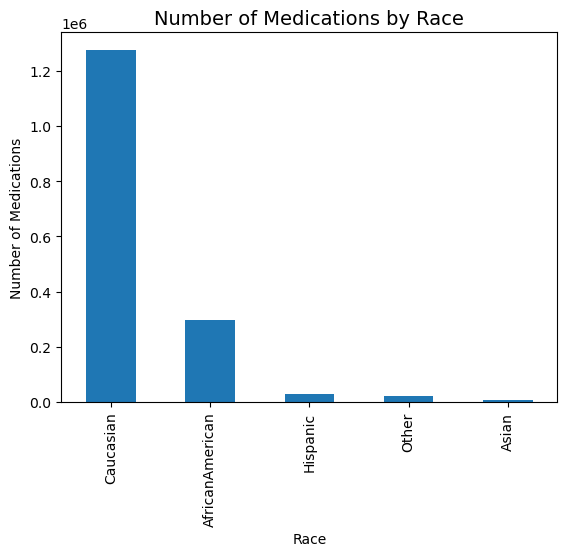

In [96]:
age_medic = df.groupby('race')['num_medications'].sum().sort_values(ascending=False).plot.bar()
plt.title ('Number of Medications by Race', fontsize = 14)
plt.xlabel('Race')
plt.ylabel('Number of Medications')
age_medic

#### GROUPING BY GENDER AND DIABETES MEDICINE  

I observe the Female falls with with the lasgest count of diabetes medicine comparing to Male.

In [97]:
gender_vs_diabetes=df.groupby(['gender', 'diabetesMed']).size().reset_index(name='count')
gender_vs_diabetes

,gender,diabetesMed,count
0,Female,No,12922
1,Female,Yes,41789
2,Male,No,10481
3,Male,Yes,36574


In [98]:
df.groupby(['gender'])['diabetesMed'].count()

gender
Female    54711
Male      47055
Name: diabetesMed, dtype: int64

<Axes: title={'center': 'Diabetes Medication by Race'}, xlabel='Race', ylabel='Count'>

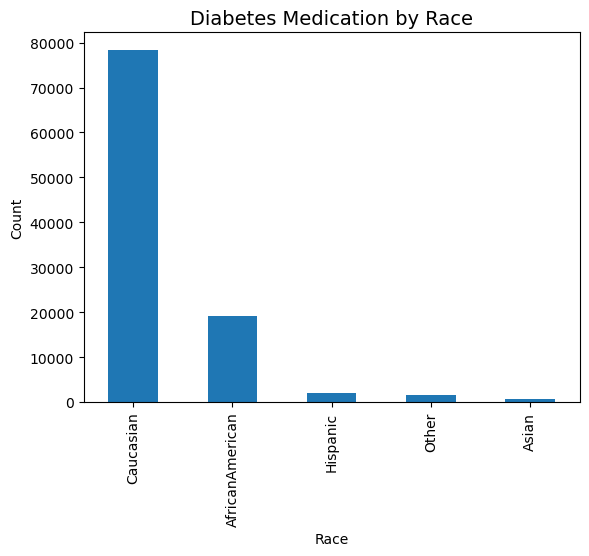

In [100]:
age_medic = df.groupby('race')['diabetesMed'].count().sort_values(ascending=False).plot.bar()
plt.title ('Diabetes Medication by Race', fontsize = 14)
plt.xlabel('Race')
plt.ylabel('Count')
age_medic

<Axes: title={'center': 'Diabetes Medication by Gender'}, xlabel='Gender', ylabel='Count'>

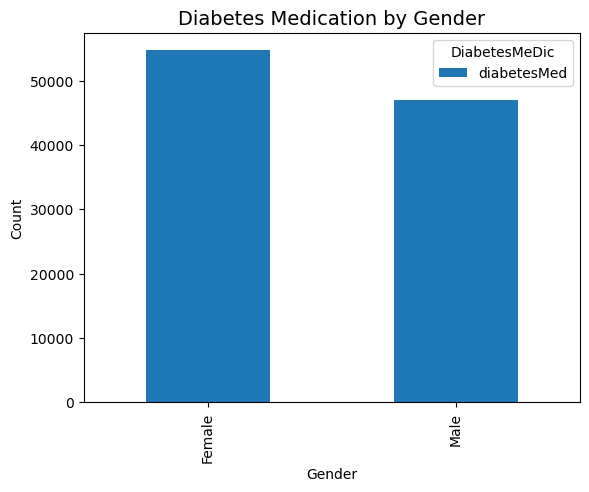

In [101]:
age_medic = df.groupby('gender')['diabetesMed'].count().sort_values(ascending=False).plot.bar()
plt.title ('Diabetes Medication by Gender', fontsize = 14)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='DiabetesMeDic')
age_medic

#### Conclusion

In [ ]:
During the analysis it is observed that there are a high volumne of Females on diabetes medication as compare to male. 
Also, the Caucasians as one of the race category shows the most on diabetes medication.
Female group seems to be falling in the group with the monst readmittion over 30 days follow by male.